In [ ]:
# Capstone project II

In [56]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Load data
df = pd.read_csv('UsArrests.csv')
df.head()

,City,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [58]:

scaler = StandardScaler()
data = df.iloc[:,1:].values
scaled_data = scaler.fit_transform(data)
data

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

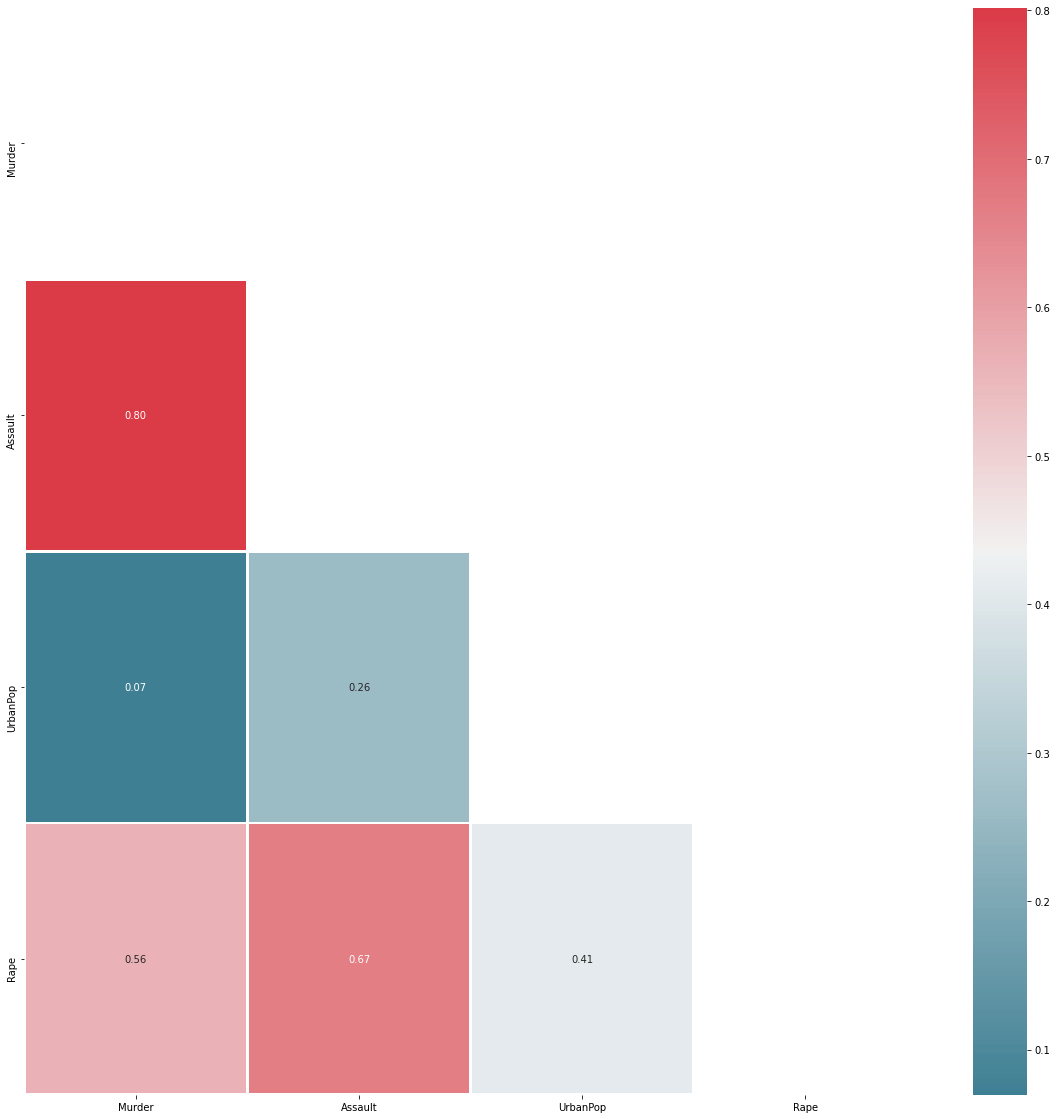

In [3]:
colormap = sns.diverging_palette(220, 10, as_cmap=True)

def corr_heatmap(df):
  # get correlations
  corrs = df.corr()

  # pick appropriate palette for heatmap

  # Plot figsize
  fig, ax = plt.subplots(figsize=(20, 20))

  # to mask mirrored side of heatmap
  dropSelf = np.zeros_like(corrs)
  dropSelf[np.triu_indices_from(dropSelf)] = True

  # Generate Heat Map, with annotations of the correlation strength and 2-decimal floats
  ax = sns.heatmap(corrs, cmap=colormap, annot=True, fmt=".2f", mask=dropSelf, linewidth=2)

  plt.show()

corr_heatmap(df)

In [88]:

# choose number of components to be generated
nr_comps = 4
pca = PCA(n_components=nr_comps)

# obtain components
principal_components = pca.fit_transform(scaled_data)

# transform the components into a pandas data frame
pca_df = pd.DataFrame(principal_components, index=df.index)

# This is to include the country code  as the rownames in the PC's
pca_df.head()

,0,1,2,3
0,0.985566,1.133392,-0.444269,0.156267
1,1.950138,1.073213,2.040003,-0.438583
2,1.763164,-0.745957,0.054781,-0.834653
3,-0.141420,1.119797,0.114574,-0.182811
4,2.523980,-1.542934,0.598557,-0.341996


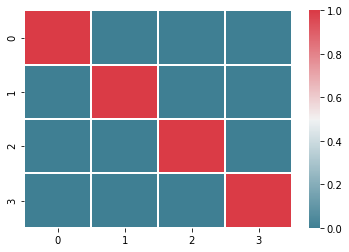

In [28]:
ax = sns.heatmap(pca_df.corr(), cmap=colormap,linewidth=1)
plt.show()

In [67]:
#***************************************************************************************************************************
#Single Linkage

#The distance between 2 clusters is defined as the shortest distance between points in the two clusters

Text(0, 0.5, 'Euclidean distances')

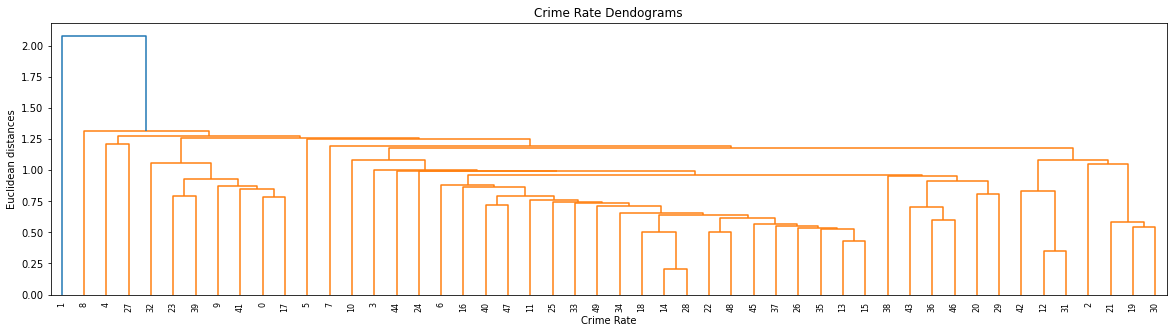

In [63]:
plt.figure(figsize=(20,5))
plt.title("Crime Rate Dendograms")
dend = sch.dendrogram(sch.linkage(scaled_data, method='single'))
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')

In [ ]:
# COMPLETE LINKAGE
# The distance between 2 clusters is defined as the maximum distance between any 2 points in the clusters

Text(0, 0.5, 'Euclidean distances')

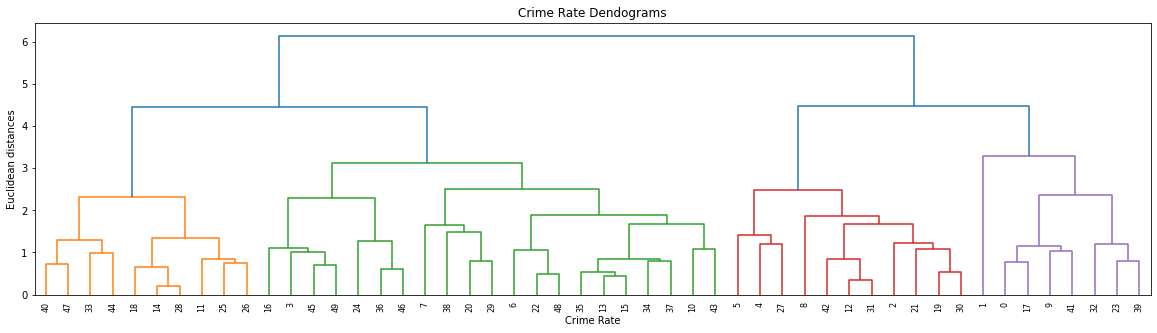

In [64]:
plt.figure(figsize=(20,5))
plt.title("Crime Rate Dendograms")
dend = sch.dendrogram(sch.linkage(scaled_data, method='complete'))
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')

In [68]:
# AVERAGE LINKAGE
# The distance between 2 clusters is defined as the average 
# distance between every point of one cluster to every other point of the other cluster

Text(0, 0.5, 'Euclidean distances')

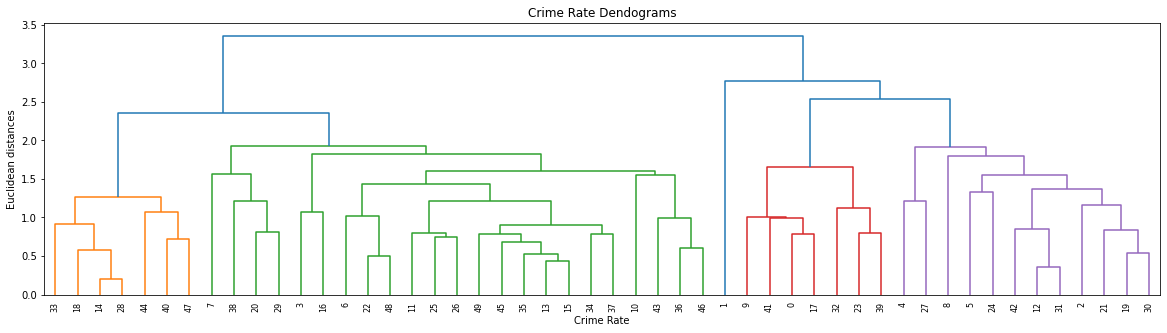

In [65]:
plt.figure(figsize=(20,5))
plt.title("Crime Rate Dendograms")
dend = sch.dendrogram(sch.linkage(scaled_data, method='average'))
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')

In [69]:
#The single linkage type will produce dendrograms which are not structured properly, whereas complete or average linkage 
#will produce clusters which have a proper tree-like structure.

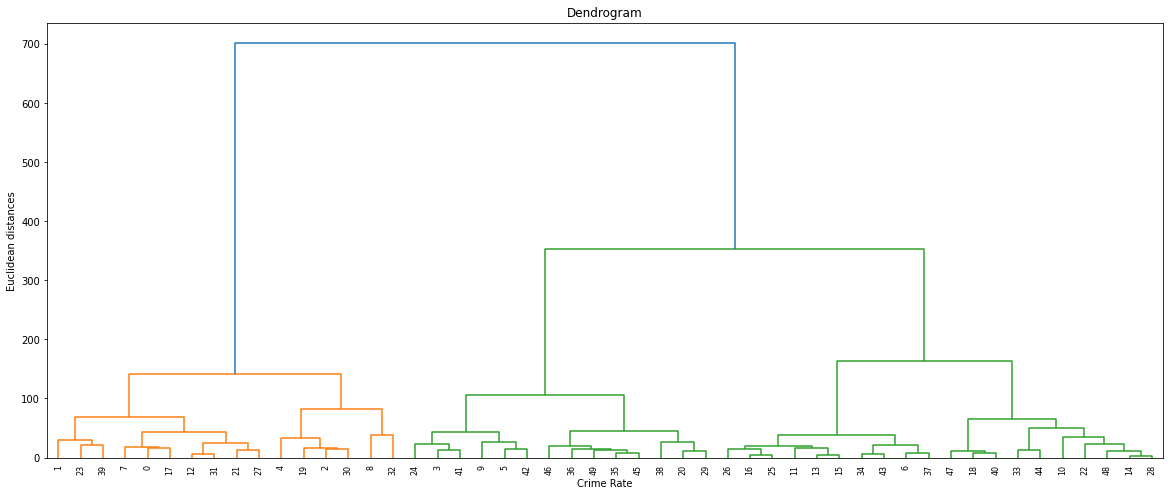

In [70]:
# With Ward method

plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(data, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')
plt.show()

In [71]:
# Fit the Agglomerative Clustering
 
AC = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')

In [72]:
# Fit and predict to have the cluster labels.
y_pred =AC.fit_predict(data)
y_pred

array([1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0,
       0, 2, 2, 0, 0, 2], dtype=int32)

In [74]:
# Fetch the cluster labels
df['cluster labels']= y_pred

In [76]:
# Let's see which State falls in which cluster
df[['City','cluster labels']]

,City,cluster labels
0,Alabama,1
1,Alaska,1
2,Arizona,1
3,Arkansas,2
4,California,1
5,Colorado,2
6,Connecticut,0
7,Delaware,1
8,Florida,1
9,Georgia,2


<AxesSubplot:xlabel='cluster labels', ylabel='Murder'>

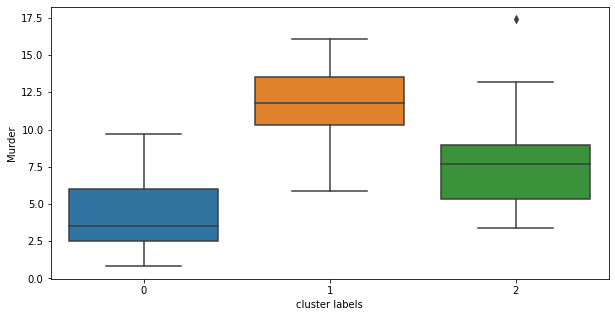

In [78]:
plt.figure(figsize=(10,5))
sns.boxplot(x='cluster labels', y='Murder', data=df)

<AxesSubplot:xlabel='cluster labels', ylabel='Assault'>

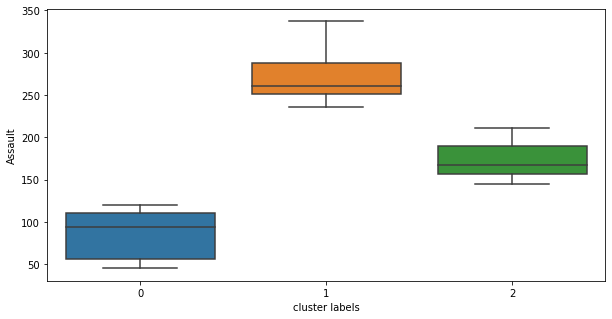

In [79]:
plt.figure(figsize=(10,5))
sns.boxplot(x='cluster labels', y='Assault', data=df)

<AxesSubplot:xlabel='cluster labels', ylabel='Rape'>

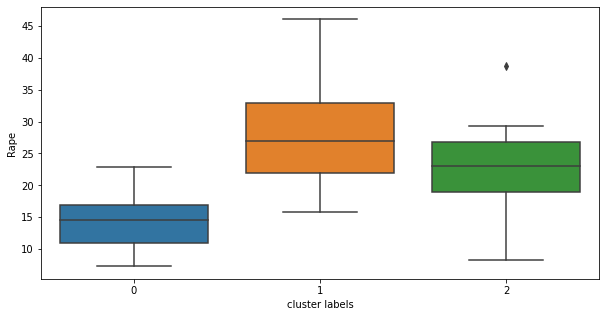

In [80]:
plt.figure(figsize=(10,5))
sns.boxplot(x='cluster labels', y='Rape', data=df)

In [ ]:
#The Cities in the Cluster-0 seems to be Safe-Zone where there are relativley less Murders,Assaults and Rapes.

#The Cities in Cluster-1 seems to have higher crime rates and can be regarded as Danger-Zone.

#The Cities in Cluster-3 seems to have moderate crime rates when compared to other zones and can be called as Moderate-Zone

In [83]:
Safe_Zone= df.groupby('cluster labels')['City'].unique()[0]
Safe_Zone

array(['Connecticut', 'Hawaii', 'Idaho', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Maine', 'Minnesota', 'Montana', 'Nebraska',
       'New Hampshire', 'North Dakota', 'Ohio', 'Pennsylvania',
       'South Dakota', 'Utah', 'Vermont', 'West Virginia', 'Wisconsin'],
      dtype=object)

In [84]:
Danger_Zone= df.groupby('cluster labels')['City'].unique()[1]
Danger_Zone

array(['Alabama', 'Alaska', 'Arizona', 'California', 'Delaware',
       'Florida', 'Illinois', 'Louisiana', 'Maryland', 'Michigan',
       'Mississippi', 'Nevada', 'New Mexico', 'New York',
       'North Carolina', 'South Carolina'], dtype=object)

In [85]:
Moderate_Zone= df.groupby('cluster labels')['City'].unique()[2]
Moderate_Zone

array(['Arkansas', 'Colorado', 'Georgia', 'Massachusetts', 'Missouri',
       'New Jersey', 'Oklahoma', 'Oregon', 'Rhode Island', 'Tennessee',
       'Texas', 'Virginia', 'Washington', 'Wyoming'], dtype=object)

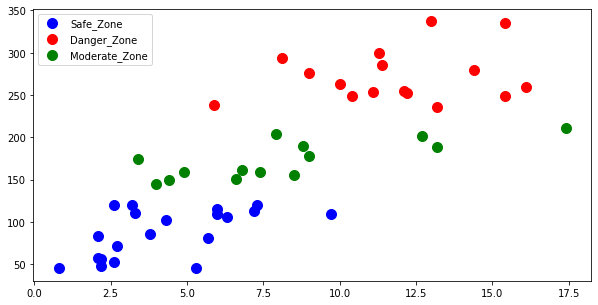

In [87]:
plt.figure(figsize=(10,5))
plt.scatter(data[y_pred==0, 0], data[y_pred==0, 1], s=100, c='blue', label ='Safe_Zone')
plt.scatter(data[y_pred==1, 0], data[y_pred==1, 1], s=100, c='red', label ='Danger_Zone')
plt.scatter(data[y_pred==2, 0], data[y_pred==2, 1], s=100, c='green', label ='Moderate_Zone')
plt.legend()
plt.show()